In [1]:
#importing packages
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os   
from zipfile import ZipFile
from data_API_downloader import Downloader, Data_pipeline
from region_splitter import Region_finder
from visualizer import Visualizer_of_criminal_data
import geopandas
from shapely import geometry
from shapely.geometry import Point
import folium

In [2]:
download = Downloader(2020,11)

In [3]:
pipeline = Data_pipeline(None,False)

In [4]:
pipeline.match_crime_data_to_polygons()
pipeline.compute_counts_per_polygon()
pipeline.preprocess_paq_data()
table = pipeline.merge_final_table()

In [5]:
table.head(5)

KOD OKRES_KOD NUTS3_KOD SPR_OB_KOD  \
0  761      3503     CZ042     563102   
1  779      3504     CZ051     563510   
2  787      3504     CZ051     563820   
3  795      3504     CZ051     563871   
4  809      3505     CZ051     564028   

                                            geometry                 ORP  \
0  POLYGON ((13.43356 50.36894, 13.43005 50.36210...               Kadaň   
1  POLYGON ((15.15200 50.84060, 15.16443 50.84090...  Jablonec nad Nisou   
2  POLYGON ((15.23190 50.82697, 15.24458 50.82463...             Tanvald   
3  POLYGON ((15.32375 50.67244, 15.32655 50.66461...        Železný Brod   
4  POLYGON ((14.99442 50.86943, 15.00204 50.86884...            Frýdlant   

   Lidé v exekuci (2021) [%]  Podíl lidí bez středního vzdělání (2021) [%]  \
0                       11.8                                          20.4   
1                        8.2                                          14.3   
2                        9.3                                          17.5   
3                        4.8                                          13.0   
4                       10.3                                          18.4   

   Domácnosti čerpající přídavek na živobytí (2020) [%]  \
0                                                9.9      
1                                                5.2      
2                                               12.9      
3                                                3.7      
4                                                6.8      

   Propadání (průměr 2015–2021) [%]  Počet kriminálních aktivit per capita  \
0                               1.9                               0.040236   
1                               1.7                               0.057835   
2                               3.2                               0.046639   
3                               1.3                               0.017988   
4                               3.7                               0.051179   

   Criminality risk index  
0               18.356158  
1               11.967837  
2               18.288510  
3                8.525390  
4               15.845629

In [6]:
visualizer = Visualizer_of_criminal_data(table)

In [7]:
maps = visualizer.get_folium_maps()
labels = visualizer.english_legend_name_buffer

In [8]:
print(labels[0])
maps[0]

Criminality per capita


In [9]:
print(labels[1])
maps[1]

People in foreclosure (2021) [%]


In [10]:
print(labels[2])
maps[2]

Dropout (average 2015–2021) [%]


In [11]:
print(labels[3])
maps[3]

Share of people without completed high school (2021) [%]


In [12]:
print(labels[4])
maps[4]

Households on allowances (2020) [%]


In [13]:
print(labels[5])
maps[5]

Criminality risk index


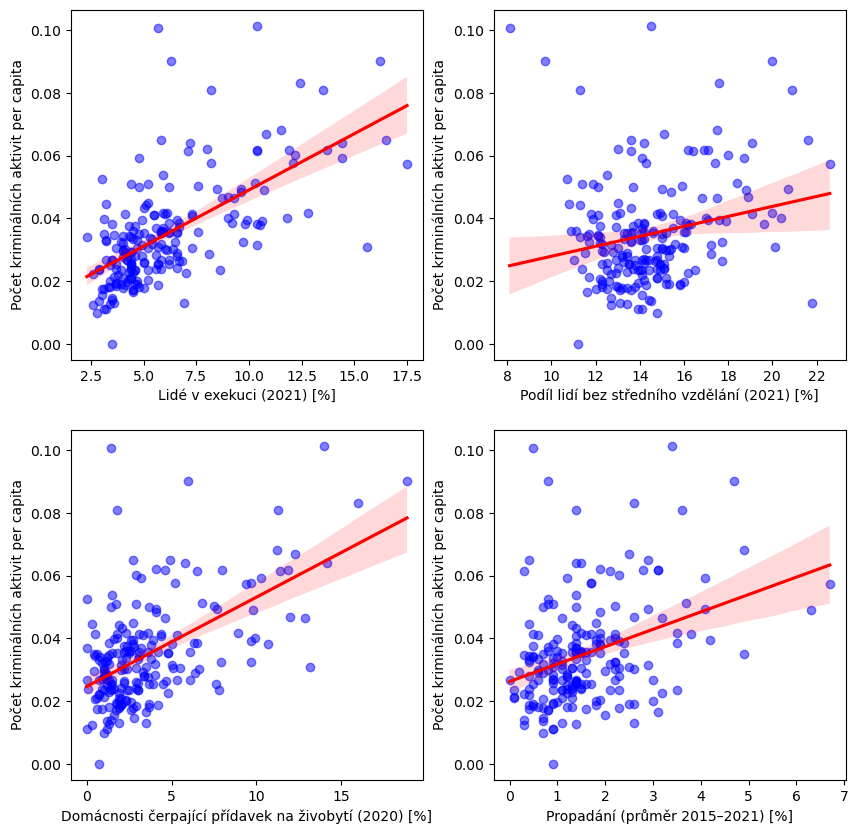

In [14]:
visualizer.show_scatter_correlations()

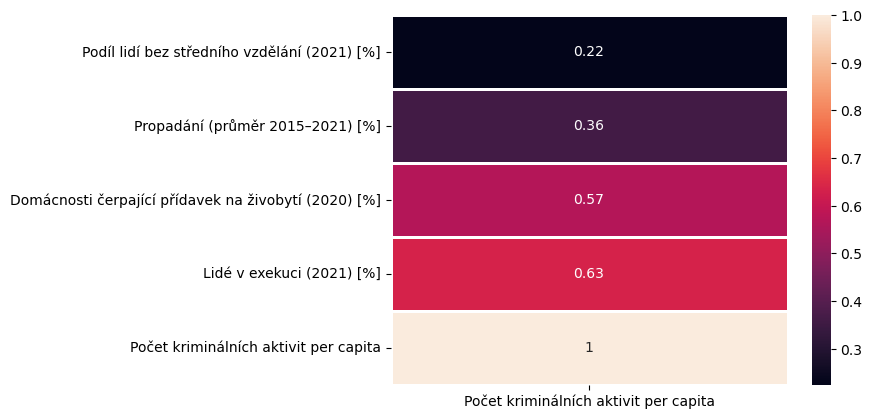

In [15]:
visualizer.show_correlation_heatmap()